# Fitting data to a curve
This program fits a set of input data to a specified function. It uses the the scipy optimize curve_fit function, and also contains code for plotting, calculating residuals, and R^2 values.

To use this code, save this program as new script, and make the edits desired there.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import scipy
import scipy.optimize

#### Input the data to use

In [2]:
# specify the path to the folder containing the data you want to use, note the path finishes with / and uses /, not \
path = "C:/Users/gjames/OneDrive - Esri Australia/Honours/Data/Gaussian curve fitting/"

In [3]:
#specify file name here
walking_data = pd.read_csv(path + "Montreal trip distance data walking work.csv")
#walking_data.columns # uncomment to see available columns

#### Defining data and plotting

Use this to visualise what the data to fit will look like. It is necessary to define what input data to use here

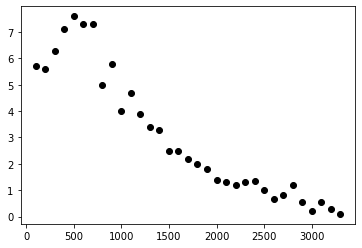

In [4]:
xdata = np.array(walking_data.Distance.iloc[1:])
ydata = np.array(walking_data.Percentage.iloc[1:])

plt.plot(xdata, ydata, "ko")

#### Specify the Function to fit
Define the curve you wish to fit the data to here.

In [5]:
def impedance_function_fit(xdata, A = 1, a = 1, b = 1):
    '''Define the impedance function mathematically'''
    
    ydata = []
    for x in xdata:
        if x <= a:
            f = A*1
        else:
            f = A*np.exp((-(x-a)**2)/b**2)
        
        ydata.append(f)
    
    return ydata

#### Run optimisation
Set results equal to the parameters that we want to find. This defines the curve we want to use

In [6]:
A, a, b = scipy.optimize.curve_fit(impedance_function_fit, xdata/1000, ydata)[0] 
    #in this case the /1000 was needed as the exponential curve was too small at high x values

#### Plot results

In [21]:
#set the range of x values to plot over
xrange_start = 0
xrange_end = 40

#set the scaling factor (speed x 0.01667)
scaling_factor = 5*0.01667

x_values = np.linspace(xrange_start, xrange_end,1000) #gives 1000 x data points

#set the parameters equal to the found ones above here
y_values = impedance_function_fit(x_values, A = A, a = a/scaling_factor, b = b/scaling_factor)

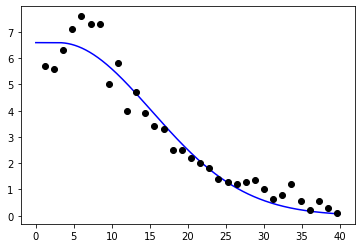

In [22]:
plt.plot(x_values, y_values, "b-", xdata/1000/scaling_factor, ydata, "ko")

#### Plot residuals
Finds the differences between the fit curve and the data

In [23]:
#rempve /1000, change parameters here
residuals = ydata - impedance_function_fit(xdata/1000, A = A, a = a, b = b) 

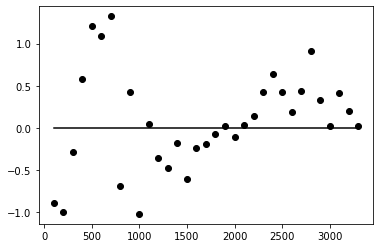

In [24]:
plt.plot(xdata, residuals, "ko", xdata, [0]*len(xdata), "k-")

#### Calculating R^2 value

In [25]:
def calculate_r_squared(residuals, ydata):
    '''Calculates the r-squared value from the residual data found above
    '''
    
    #find the residual sum of squares
    ss_res = np.sum(residuals**2)
    
    #find the total sum of squares
    ss_tot = np.sum((ydata - np.mean(ydata))**2)
    
    #evaluate r_squared using the required formula
    r_squared = 1 - ss_res/ss_tot
    
    
    return r_squared

In [26]:
print("The R^2 value is ", calculate_r_squared(residuals, ydata))

The R^2 value is  0.9395807845724573


#### Found Parameters
The parameters we need for future calculations, displayed from the above results

In [27]:
print("A =", A, ", a =", a, ", b =", b)

A = 6.5943434860685795 , a = 0.24668954664504333 , b = 1.4430855472086368
